<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/week%203%20-%20Pandas%20-%20Data%20Cleaning/%20Introduction_to_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Walkthrough - Lab 3

%%html

<div>
<td> 
<img src="https://www.unil.ch/logo/files/live/sites/logo/files/web/eps/lo_unil06_bleu.eps" style="padding-right:10px;width:240px;float:left"/></td>
<h2 style="white-space: nowrap">Business Intelligence and Analytics</h2></td>
<hr style="clear:both">
<p style="font-size:0.85em; margin:2px; text-align:justify">

</div>



The goal of this Walkthrough is to allow you to familiarize yourself with Exploratory Data Analysis (EDA), histograms and correlations.




# <a class="anchor"></a> 1. Exploratory Data Analysis





## <a class="anchor"></a> 1.1. Loading and getting a first look at our Data 


In [77]:
#Let's import pandas
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


The dataset we will use is available under the following url :`'https://data.cityofnewyork.us/api/views/43nn-pn8j/rows.csv?accessType=DOWNLOAD'`. This dataset containts the results of restaurant inspections in NYC.

In [78]:
#You should already know what this block of code does. Ignore the arguments after url for now
restaurants = pd.read_csv('https://data.cityofnewyork.us/api/views/43nn-pn8j/rows.csv?accessType=DOWNLOAD', 
                          encoding='utf_8', 
                          dtype = 'unicode',
                          parse_dates = True,
                          infer_datetime_format = True,
                          low_memory=False)

#Let's have a look at the data
restaurants.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,41574968,PHAYUL RESTAURANT,Queens,3765,74 STREET,11372,7184241869,Asian,01/28/2020,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,32,NaN,NaN,02/23/2021,Cycle Inspection / Initial Inspection,40.747172851789,-73.891483883179,403,25,028900,4029815,4012850004,QN28
1,40965048,UNCLE LOUIE G'S ITALIAN ICES & ICE CREAM,Brooklyn,3138,AVENUE U,11229,7183661730,"Ice Cream, Gelato, Yogurt, Ices",07/26/2017,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,11,A,07/26/2017,02/23/2021,Cycle Inspection / Initial Inspection,40.60243191883,-73.933925756428,315,46,063200,3248250,3088190005,BK17
2,41577295,LECHONERA TROPICAL & GRILL,Manhattan,172,EAST 103 STREET,10029,2127221344,Latin American (Central and South America),10/04/2019,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140º F.,Y,12,A,10/04/2019,02/23/2021,Cycle Inspection / Initial Inspection,40.789966950447,-73.946884242563,111,08,016600,1082390,1016300038,MN33
3,40660193,COOKIE'S LOUNGE,Queens,13208,CROSSBAY BOULEVARD,11417,7188355693,American,11/21/2017,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Y,9,A,11/21/2017,02/23/2021,Cycle Inspection / Initial Inspection,40.676469925937,-73.843657609252,410,32,005800,4245349,4113540024,QN56
4,40974766,CHIKALICIOUS DESSERT BAR,Manhattan,203,EAST 10 STREET,10003,2129959511,Other,06/15/2017,Violations were cited in the following area(s).,04K,Evidence of rats or live rats present in facil...,Y,12,A,06/15/2017,02/23/2021,Cycle Inspection / Initial Inspection,40.729590997049,-73.986368724227,103,02,004000,1006433,1004520001,MN22


Let's use the `.describe()` function to get a quick overview of the Data we will be working with.


In [79]:
restaurants.describe()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
count,396331,395681,396331,395031,396245,389631,396313,396331,396331,392826,388549,385220,385220,377669,200141,197852,396331,392826,394653,394653,388075,388075,388075,386289,394653,388075
unique,29165,22846,6,8134,2399,230,26971,82,1418,5,105,90,2,136,7,1306,1,31,23346,23346,68,51,1190,20257,19919,193
top,50018552,DUNKIN',Manhattan,1,BROADWAY,10003,7185958100,American,01/01/1900,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Y,12,A,06/13/2019,02/23/2021,Cycle Inspection / Initial Inspection,0,0,105,03,003800,4000000,1,MN17
freq,98,4149,155933,2222,14423,10214,274,81766,3505,368469,56446,56446,215209,41510,158692,490,396331,230941,6578,6578,31812,34740,3240,1575,3925,23458


## <a class="anchor"></a> 1.2. Dtypes and descriptive statistics

Recall from week2 that there are different dtypes in Pandas. Have a look at this table once again:


| Pandas dtype  | Python type  | NumPy type|Usage
| :--- | :--- | :--- | :--- |
| object| str or mixed | string_, unicode_, mixed types| Text or mixed numeric and non_numeric values |
| int 64| int| int_, int8, int16, int32, int64, uint8, uint18, uint32, uint64 | Integer numbers i.e. [1,2,3,...] |
| float64| float| float_, float15, float32, float64 | Floating point numbers (They contain decimal points) |
| bool| bool|bool_| True/False values|
| datetime64 | NA | datetime64[ns]     | Date and time values  |
| timedelta[ns] | NA  | NA| Differences between two datetime|
| category | NA| NA| Finite list of text values|


Now let's see what the dtypes of our DF are:


In [80]:
restaurants.dtypes

CAMIS                    object
DBA                      object
BORO                     object
BUILDING                 object
STREET                   object
ZIPCODE                  object
PHONE                    object
CUISINE DESCRIPTION      object
INSPECTION DATE          object
ACTION                   object
VIOLATION CODE           object
VIOLATION DESCRIPTION    object
CRITICAL FLAG            object
SCORE                    object
GRADE                    object
GRADE DATE               object
RECORD DATE              object
INSPECTION TYPE          object
Latitude                 object
Longitude                object
Community Board          object
Council District         object
Census Tract             object
BIN                      object
BBL                      object
NTA                      object
dtype: object

### <a class="anchor"></a> 1.2.1 Descriptive Statistics for numerical variables
 All our colums are `object` type. We will use the `pd.to_numeric()` function to convert some of the columns to `float64` type and see if the `.describe()` funciton can give us some more useful statistical information.

In [81]:
#We convert the "SCORE" column to numeric
restaurants["SCORE"] = pd.to_numeric(restaurants["SCORE"])

#Describe the SCORE column
restaurants.SCORE.describe()

count    377669.000000
mean         20.114108
std          14.731309
min          -1.000000
25%          11.000000
50%          15.000000
75%          26.000000
max         164.000000
Name: SCORE, dtype: float64

Now that SCORE is a numeric variable, we can use the `.hist()` function to plot an histogram and get a better look at our data.

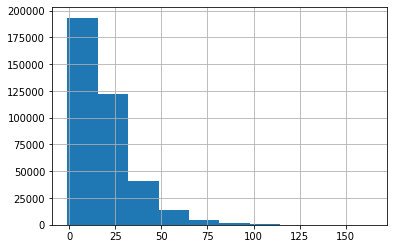

In [82]:
restaurants["SCORE"].hist()

The `hist()` function allows to pass multiple arguments, you can find more information if you follow this [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)


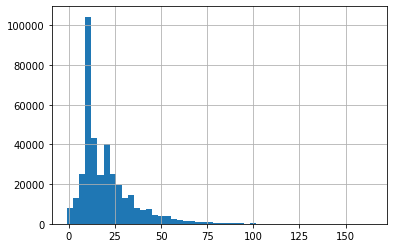

In [83]:
restaurants["SCORE"].hist(bins = 50)

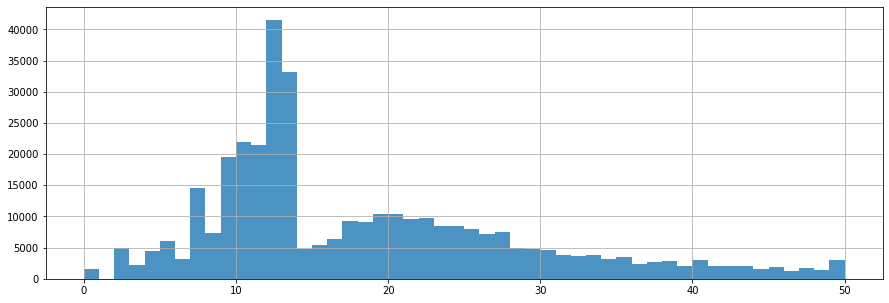

In [84]:
# A quick exposure to various options of the "hist" command 
restaurants.SCORE.hist(bins=50, # use 50 bars
                          range=(0,50), # x-axis from 0 to 50
                          density=False,  # show normalized count (density=True), or raw counts (density= False)
                          figsize=(15,5), # controls the size of the plot
                          alpha = 0.8 # make the plot 20% transparent
                         )

We now have some statistical information for the SCORE column. Let's convert some other columns to a more useful type.

### <a class="anchor"></a> 1.2.2 Descriptive statistics for DATETIME variables


Remember that one of the dtypes handles Date and Time. Some of the columns in our DF contain this type of data, so let's convert these columns to the `datetime64` dtype.


In [88]:
restaurants["GRADE DATE"].head(10)

0           NaN
1    07/26/2017
2    10/04/2019
3    11/21/2017
4    06/15/2017
5           NaN
6           NaN
7    11/01/2017
8    09/12/2019
9           NaN
Name: GRADE DATE, dtype: object

For that, we need to understand first how to parse dates using the [Python conventions.](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) 

The relevant entries from the table are:

    %m Month as a zero-padded decimal number.
    %d Day of the month as a zero-padded decimal number.
    %Y Year with century as a decimal number.

Now that we know in what format the dates were entried (remember that americans write dates like this `month/day/year` , as opposed to `day/month/year`), we can convert our columns.

In [89]:
#We convert some columnd to the datetime64 tyoe
restaurants["GRADE DATE"] = pd.to_datetime(restaurants["GRADE DATE"], format="%m/%d/%Y")
restaurants["RECORD DATE"] = pd.to_datetime(restaurants["RECORD DATE"], format="%m/%d/%Y")
restaurants["INSPECTION DATE"] = pd.to_datetime(restaurants["INSPECTION DATE"], format="%m/%d/%Y")

#Now we have another look at the dtaypes
restaurants.dtypes

CAMIS                             int64
DBA                              object
BORO                             object
BUILDING                         object
STREET                           object
ZIPCODE                         float64
PHONE                           float64
CUISINE DESCRIPTION              object
INSPECTION DATE          datetime64[ns]
ACTION                           object
VIOLATION CODE                   object
VIOLATION DESCRIPTION            object
CRITICAL FLAG                    object
SCORE                           float64
GRADE                            object
GRADE DATE               datetime64[ns]
RECORD DATE              datetime64[ns]
INSPECTION TYPE                  object
Latitude                         object
Longitude                        object
Community Board                 float64
Council District                float64
Census Tract                    float64
BIN                             float64
BBL                             float64


Let's see what the `.describe()` function can do now.

In [90]:
restaurants[["INSPECTION DATE", "GRADE DATE", "RECORD DATE"]].describe(datetime_is_numeric=True)

,INSPECTION DATE,GRADE DATE,RECORD DATE
count,396331,197852,396331
mean,2017-09-01 12:08:09.299996928,2018-09-16 16:47:51.091618048,2021-02-22 23:59:59.988484352
min,1900-01-01 00:00:00,2011-05-27 00:00:00,2021-02-23 00:00:00
25%,2017-12-28 00:00:00,2018-01-11 00:00:00,2021-02-23 00:00:00
50%,2018-10-24 00:00:00,2018-10-23 00:00:00,2021-02-23 00:00:00
75%,2019-07-11 00:00:00,2019-07-03 00:00:00,2021-02-23 00:00:00
max,2021-02-17 00:00:00,2020-12-31 00:00:00,2021-02-23 00:00:00


### <a class="anchor"></a> 1.2.3 Descriptive statistics for categorical variables

Now let's handle categorical data. This is most commonly useful when we have variables that have an implicit order (e.g., the A/B/C grade of the restaurant).

We can use the pandas `.Categorical` function for this.

In [91]:
#We convert the categorical columns
restaurants["BORO"] =  pd.Categorical(restaurants["BORO"], ordered=False)
restaurants["GRADE"] =  pd.Categorical(restaurants["GRADE"], categories = ['A', 'B', 'C'], ordered=True)
restaurants["VIOLATION CODE"] =  pd.Categorical(restaurants["VIOLATION CODE"], ordered=False)
restaurants["CRITICAL FLAG"] =  pd.Categorical(restaurants["CRITICAL FLAG"], ordered=False)
restaurants["ACTION"] =  pd.Categorical(restaurants["ACTION"], ordered=False)
restaurants["CUISINE DESCRIPTION"] =  pd.Categorical(restaurants["CUISINE DESCRIPTION"], ordered=False)

#We have another look at the dtypes
restaurants.dtypes

CAMIS                             int64
DBA                              object
BORO                           category
BUILDING                         object
STREET                           object
ZIPCODE                         float64
PHONE                           float64
CUISINE DESCRIPTION            category
INSPECTION DATE          datetime64[ns]
ACTION                         category
VIOLATION CODE                 category
VIOLATION DESCRIPTION            object
CRITICAL FLAG                  category
SCORE                           float64
GRADE                          category
GRADE DATE               datetime64[ns]
RECORD DATE              datetime64[ns]
INSPECTION TYPE                  object
Latitude                         object
Longitude                        object
Community Board                 float64
Council District                float64
Census Tract                    float64
BIN                             float64
BBL                             float64


In [92]:
restaurants["DBA"].value_counts()[:10]

DUNKIN'                                  4149
SUBWAY                                   2944
STARBUCKS                                2130
MCDONALD'S                               1925
KENNEDY FRIED CHICKEN                    1339
DUNKIN', BASKIN ROBBINS                  1165
CROWN FRIED CHICKEN                      1106
BURGER KING                              1031
POPEYES                                   950
GOLDEN KRUST CARIBBEAN BAKERY & GRILL     780
Name: DBA, dtype: int64

An explanation:
 * The `value_counts()` function counts how many different values there are.
 * The `[:10]` filters the list, thus showing us only the first 10 values.  


 

In [93]:
restaurants["CUISINE DESCRIPTION"].value_counts()[:5]

American                                      81766
Chinese                                       41607
Pizza                                         25394
Café/Coffee/Tea                               19616
Latin American (Central and South America)    17301
Name: CUISINE DESCRIPTION, dtype: int64

We can also plot the data, lets start by plotting the different categories of food with the `.plot()` function.

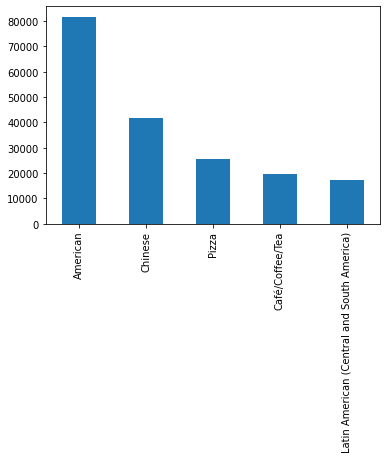

In [94]:
restaurants["CUISINE DESCRIPTION"].value_counts()[:5].plot(kind='bar')

In [95]:
popular = restaurants["CUISINE DESCRIPTION"].value_counts()
popular

American                                      81766
Chinese                                       41607
Pizza                                         25394
Café/Coffee/Tea                               19616
Latin American (Central and South America)    17301
                                              ...  
Iranian                                          68
Czech                                            43
Nuts/Confectionary                               43
Chilean                                          32
Basque                                            9
Name: CUISINE DESCRIPTION, Length: 82, dtype: int64

If you have a look at the results of the last block of code, you will see that is seems to be quite detailed. We might for example want to treat "Cuban", "Dominican", "Puerto Rican", "South & Central American" just as "Latin American".

The `.replace()` function allows us to do this.

In [96]:
#Latin American food
restaurants["CUISINE DESCRIPTION"].replace(
    to_replace=['Latin American (Central and South America)', 'Chilean'],
    value = 'Latin American',
    inplace=True
)

#Coffe bar
restaurants["CUISINE DESCRIPTION"].replace(
    to_replace='CafÃ©/Coffee/Tea',
    value = 'Cafe/Coffee/Tea',
    inplace=True
)

In [97]:
popular = restaurants["CUISINE DESCRIPTION"].value_counts()
popular

American              81766
Chinese               41607
Pizza                 25394
Café/Coffee/Tea       19616
Latin American        17333
                      ...  
Fruits/Vegetables        80
Iranian                  68
Nuts/Confectionary       43
Czech                    43
Basque                    9
Name: CUISINE DESCRIPTION, Length: 81, dtype: int64

We can now plot the same barchart again, and see what the results are:



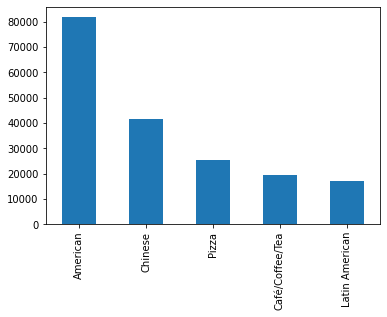

In [98]:
popular = restaurants["CUISINE DESCRIPTION"].value_counts()
popular[:5].plot(kind='bar')

## <a class="anchor"></a> 1.3 Selecting Subsets




To select rows, we can use the following approach, where we generate a list of boolean values, one for each row of the dataframe, and then we use the list to select which of the rows of the dataframe we want to keep

In [99]:
# Create the condition "has mice" for code 04L
mice = (restaurants["VIOLATION CODE"] == "04L")
mice.head()

0    False
1    False
2    False
3    False
4    False
Name: VIOLATION CODE, dtype: bool

In [100]:
# Apply the condition to the dataframe "restaurants" and store the result 
# in a dataframe called  has_mice

has_mice = restaurants[mice]
has_mice.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
5,41627520,EL FOGON COSTENO RESTAURANT.,Queens,109-12,NORTHERN BOULEVARD,11368.0,7.182053e+09,Spanish,2018-03-19,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,11.0,NaN,NaT,2021-02-23,Cycle Inspection / Initial Inspection,40.757851402916,-73.859864309837,403.0,21.0,38100.0,4042811.0,4.017240e+09,QN26
8,50090118,DA E NET 777 CAFE,Brooklyn,1223,AVENUE U,11229.0,6.462871e+09,Eastern European,2019-09-12,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,11.0,A,2019-09-12,2021-02-23,Cycle Inspection / Re-inspection,40.59850501589,-73.959395621383,315.0,48.0,58200.0,3197934.0,3.073160e+09,BK25
36,50057264,BOMBAY SPICE,Brooklyn,1018,BERGEN STREET,11216.0,7.184843e+09,Indian,2019-01-22,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,15.0,B,2019-01-22,2021-02-23,Cycle Inspection / Re-inspection,40.676207053592,-73.952271186711,308.0,36.0,31500.0,3030641.0,3.012190e+09,BK61
88,40367373,JACKSON HOLE,Manhattan,232,EAST 64 STREET,10065.0,2.123717e+09,American,2018-07-09,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,9.0,A,2018-07-09,2021-02-23,Cycle Inspection / Re-inspection,40.764309967429,-73.963456427466,108.0,4.0,11000.0,1043865.0,1.014180e+09,MN31
90,50073106,PAPA JOHN'S,Manhattan,523,WEST 207 STREET,10034.0,7.182957e+09,Pizza,2019-02-22,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,9.0,A,2019-02-22,2021-02-23,Cycle Inspection / Initial Inspection,40.865222878717,-73.919617604491,112.0,10.0,29300.0,1064793.0,1.022230e+09,MN01


In [101]:
# List the most frequent DBA values in the data of restaurants that have mice
has_mice["DBA"].value_counts()[:20]

SUBWAY                                   254
DUNKIN'                                  146
KENNEDY FRIED CHICKEN                    127
CROWN FRIED CHICKEN                      116
STARBUCKS                                 85
MCDONALD'S                                74
POPEYES                                   71
GOLDEN KRUST CARIBBEAN BAKERY & GRILL     67
BURGER KING                               65
DUNKIN', BASKIN ROBBINS                   57
KFC                                       40
DOMINO'S                                  34
LITTLE CAESARS                            33
AMC THEATRES                              31
CARVEL ICE CREAM                          29
LE PAIN QUOTIDIEN                         24
PAPA JOHN'S                               22
VIVI BUBBLE TEA                           22
EMPANADAS MONUMENTAL                      21
INSOMNIA COOKIES                          21
Name: DBA, dtype: int64

In [102]:
has_mice["CAMIS"].value_counts()[:5]

50016943    13
50015263    13
41642251    12
50046623    12
50058969    12
Name: CAMIS, dtype: int64

And we can use more complex conditions.

In [103]:
#Restaurants in Brooklyn that have mices
mice_Brooklyn =  ( (restaurants["VIOLATION CODE"] == "04L") 
                    & (restaurants["BORO"] == "Brooklyn") )

has_mice_brooklyn = restaurants[mice_Brooklyn]
has_mice_brooklyn.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
8,50090118,DA E NET 777 CAFE,Brooklyn,1223,AVENUE U,11229.0,6.462871e+09,Eastern European,2019-09-12,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,11.0,A,2019-09-12,2021-02-23,Cycle Inspection / Re-inspection,40.59850501589,-73.959395621383,315.0,48.0,58200.0,3197934.0,3.073160e+09,BK25
36,50057264,BOMBAY SPICE,Brooklyn,1018,BERGEN STREET,11216.0,7.184843e+09,Indian,2019-01-22,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,15.0,B,2019-01-22,2021-02-23,Cycle Inspection / Re-inspection,40.676207053592,-73.952271186711,308.0,36.0,31500.0,3030641.0,3.012190e+09,BK61
228,50087423,STEP ON TOP TAKE OUT RESTAURANT,Brooklyn,2810,AVENUE D,11226.0,3.476632e+09,"Caribbean (Inc. Cuban, Puerto Rican)",2019-08-13,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,11.0,A,2019-08-13,2021-02-23,Cycle Inspection / Initial Inspection,40.640825971612,-73.95021031058,317.0,45.0,82800.0,3120477.0,3.052150e+09,BK95
374,41410071,RIMINI PASTRY SHOPPE,Brooklyn,6822,BAY PARKWAY,11204.0,7.182361e+09,"Cakes, Cupcakes, Desserts",2019-05-13,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,13.0,NaN,NaT,2021-02-23,Cycle Inspection / Initial Inspection,40.611658584394,-73.983713257125,311.0,47.0,25800.0,3336287.0,3.055800e+09,BK28
395,50098288,J II CAFE,Brooklyn,5114,13 AVENUE,11219.0,7.184386e+09,Jewish/Kosher,2020-02-05,Establishment Closed by DOHMH. Violations wer...,04L,Evidence of mice or live mice present in facil...,Y,47.0,NaN,NaT,2021-02-23,Cycle Inspection / Initial Inspection,40.633763300687,-73.993439181713,312.0,44.0,22000.0,3138364.0,3.056550e+09,BK88


In [104]:
has_mice_brooklyn["DBA"].value_counts()[:20]

CROWN FRIED CHICKEN                      69
DUNKIN'                                  32
BURGER KING                              31
SUBWAY                                   29
GOLDEN KRUST CARIBBEAN BAKERY & GRILL    27
KENNEDY FRIED CHICKEN                    21
KFC                                      18
PAPA JOHN'S                              14
STARBUCKS                                13
DUNKIN', BASKIN ROBBINS                  13
COLD STONE CREAMERY                      12
CAFE CREOLE                              12
COCO ROCO RESTAURANT                     11
FISHERMAN'S COVE                         11
AUTHENTIC SZECHUAN                       11
DOUBLE DRAGON                            11
RINCONCITO FAMILIAR MEXICAN CUISINE      11
TAQUERIA RESTAURANTE MI BARRIO           11
TASTEE PATTEE BAKERY AND GRILL           10
GOLDEN DRAGON RESTAURANT                 10
Name: DBA, dtype: int64

## <a class="anchor"></a> 1.3 Exercice


In [ ]:
# Use the .head() function on the "VIOLATION CODE" column
restaurants["Your code here"]."Your code here"

In [ ]:
#Use the .value_counts() function to count the number of occurences by violation code
violation_counts = "Your code here"."Your code here"


In [ ]:
#Have a look at the first 10 values
violation_counts["Your code here" : "Your code here"]

In [ ]:
#Plot the 20 violation codes ocurring the most
"Your code here".plot(kind = 'bar')

# <a class="anchor"></a> 2 Boxplots and correlations

We will now change datasets. This dataset containts the compensation of the CEO's of different companies.


In [105]:
#Run this cell
url = "https://raw.githubusercontent.com/michalis0/Business-Intelligence-and-Analytics/master/data/CEO%20compensation.csv"
data = pd.read_csv(url) 
data.head(3) #only shows the first 3 rows

,Total Comp,Top 20,Wide Industry,Company,CEO,City of Birth,State of Birth,Age,Undergrad,UG Degree,UG Date,AgeOfUnder,Graduate,Grad Degree,MBA?,MasterPhd?,G_date,AgeOfGradu,YearsFirm,YearsCEO,Salary,Bonus,other,St_gains,Comp for 5 yrs,Stock owned,Sales,Profits,Return over 5 yrs,Industry,Industry Code
0,203020000.0,True,Travel,Walt Disney,Mr. Michael D Eisner,New York,NY,52,Denison U,BA,64.0,22.0,NaN,none,0,0,NaN,NaN,10,10,750000.0,NaN,9667.0,202261000.0,236771000.0,0.561,8865,779.5,17.0,Travel-hotelsrecreation,8
1,53110900.0,True,Financial,Travelers,Mr. Sanford I Weill,New York,NY,61,Cornell,BA,55.0,22.0,NaN,none,0,0,NaN,NaN,8,8,1018750.0,3030310.0,2161890.0,46900000.0,141605000.0,1.168,6797,950.0,28.0,Financial services-leasefinance,1
2,38675400.0,True,Insurance,Conseco,Mr. Stephen C Hilbert,Terre Haute,IN,48,NaN,NaN,NaN,NaN,NaN,none,0,0,NaN,NaN,15,15,250000.0,8287670.0,190570.0,29947100.0,51156100.0,2.842,2637,308.9,76.0,Insurance-lifehealth,4


In [106]:
# Run this cell to drop the rows where there are missing values
data.dropna(inplace=True)

## <a class="anchor"></a> 2.1 Boxplots

Pandas allows you to plot boxplots with your data. If you do not remember what a Boxplot is you can refresh your memory following this link. Essentially they allow to see the following elements:

* Minimum
* Maximum
* Median
* Quartiles
* Outliers

We will use the `.boxplot()` function to plot the age of the CEO's. 



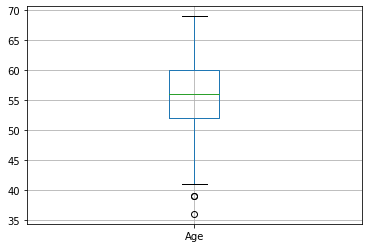

In [107]:
#This values should help you understad the boxplot
data["Age"].describe()

#Boxplot
data.boxplot(column = "Age")


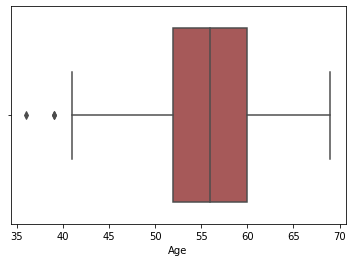

In [108]:
#The sns library also has a boxplot function, though the syntax differs a bit
sns.boxplot(x=data["Age"],color="r", saturation=0.3)

### <a class="anchor"></a> 2.1.2 Boxplot exercice

Use the .boxplot function with the "Bonus" column. What is the mean, median, max, min and what are the outlier values?

Subsequentially check your answers using the .describe() function.


In [ ]:
#Generate the Boxplot

In [ ]:
#Check your answers

## <a class="anchor"></a> 2.1 Scatterplots and Correlation

This plots are useful to find correlations between variables. Let's see if we can find any correlation (visually) between the Age and the Salary of the CEO's.

The function's name is scatterplot and it is included in the sns library, it is therefore called like this:

`sns.scatterplot(x= Your_data_1, y= Your_data_2)`


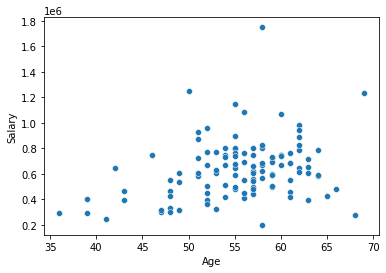

In [109]:
sns.scatterplot(x=data["Age"], y=data["Salary"])

Pandas also includes a function `corr` which allows to easily calculate [Pearsons r coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient).

In [110]:
data["Age"].corr(data["Salary"])

0.30571805690619325

You can also include a third variable if you want to. In order to plot 3-different variables in 2 dimensions we can change the collor of the third variable. This is done with the `hue` argument.

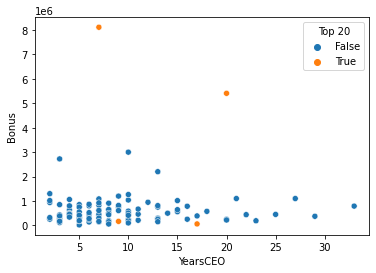

In [111]:
sns.scatterplot(x=data["YearsCEO"], y=data["Bonus"],hue=data["Top 20"])

## <a class="anchor"></a> 2.2 Pairgrids

Pairgrids can be a usefool tool to find correlations. They allow us to plot the relationships of multiple variables against each other, 2 at a time.


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:132: UserWarning: The handle <matplotlib.patches.Patch object at 0x7fb5c31ce6d0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self.fig.legend(handles, labels, **kwargs)


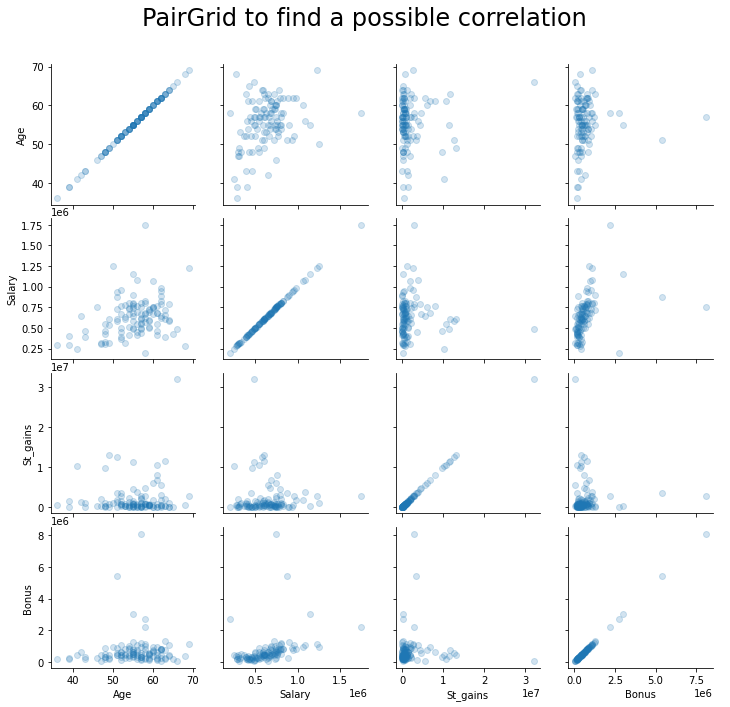

In [112]:
g = sns.PairGrid(data, vars=['Age', 'Salary', 'St_gains', 'Bonus'],
                 palette='pale red')
g.map(plt.scatter, alpha=0.2)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('PairGrid to find a possible correlation', size=24)
g.add_legend();

## <a class="anchor"></a> 2.3 Exercice

Can you see any visible correlation between the above variables? Use the `.corr()` function to check if your intiution was right.


In [ ]:
data["Your_data_1"].corr(data["Your_data_2"])